제목

In [ ]:
# 필요환 라이브러리
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy import stats

데이터  불러오기

In [ ]:
url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
data = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
data

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


데이터 전처리

In [ ]:
# 결측치 확인 및 없애기
print(data.isnull().sum())
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.dropna(axis = 0, inplace =True)

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [ ]:
# 인덱스 번호 재설정하기
data.reset_index(inplace = True)
data.drop(['index'], axis =1, inplace = True)

In [ ]:
# 출고량 컬럼들 숫자로 통일 되게 정리

#M,K 떼고 숫자들로 바꾸기
def MK(x):
  if 'K' in x:
    x = x[:len(x)-1]
    x = float(x)*1000
  elif 'M' in x:
    x = x[:len(x)-1]
    x = float(x)*1000000
  else:
    x = float(x)*1000000
  return x   

In [ ]:
# 데이터 프레임에 함수 적용
for column in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
  data[column] = data[column].apply(MK)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


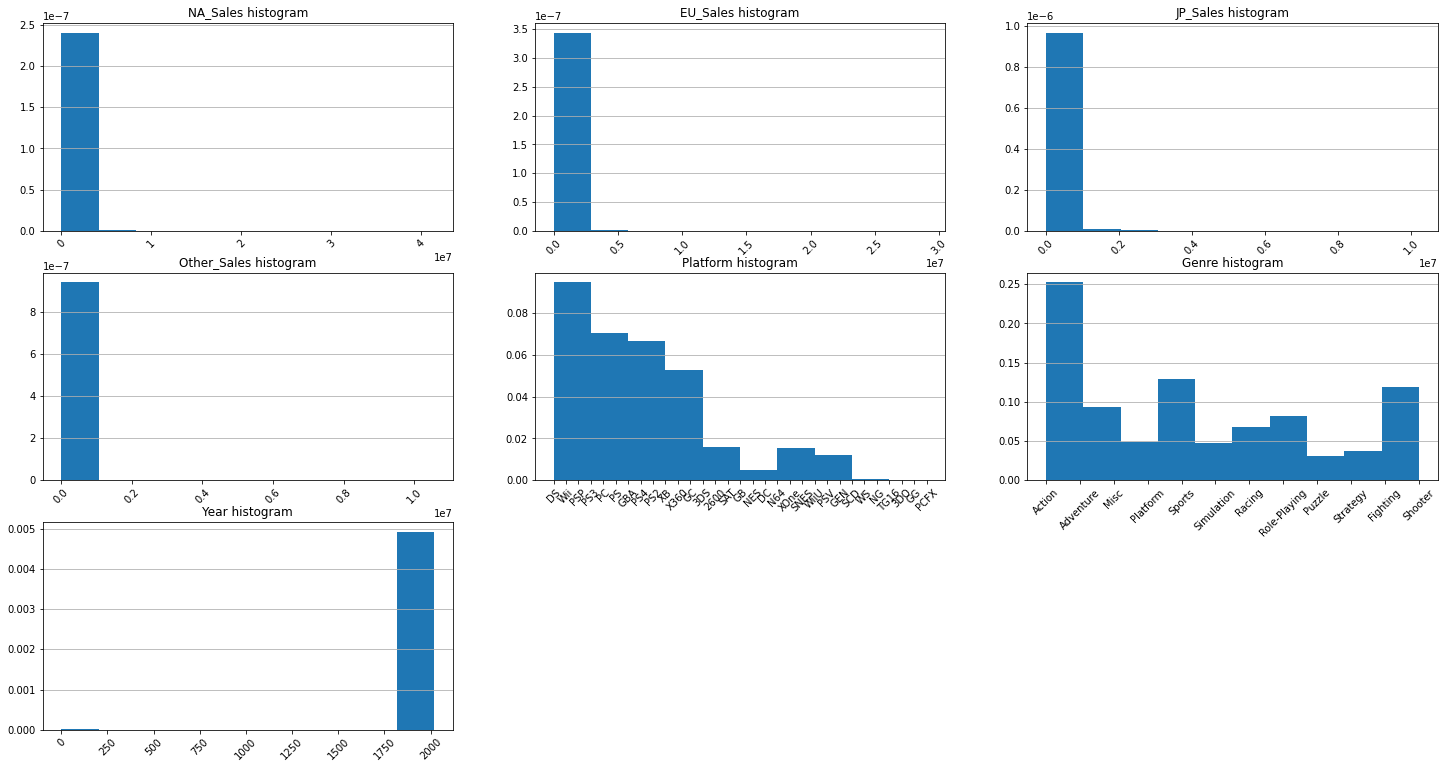

In [ ]:
# 데이터 시각화 하여 살펴보기 
plt.figure(figsize = (25,13))

for i, col in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Platform', 'Genre', 'Year']):
    plt.subplot(3,3,i+1)

    plt.hist(data[col], density=True)

    plt.title(col + ' histogram')
    plt.xticks(rotation=45)
    plt.grid(True, axis = 'y')
plt.show()

In [ ]:
# Year 연도의 그래프가 이상함을 감지, 연도가 250년 전이 표기 되어 있으며 x축이 일반적으로 아는 연도와 상이하다,

In [ ]:
# 출시연도 정수 형태로만 표현
data['Year'] = data['Year'].astype(int)

In [ ]:
# Year 데이터 통일
def year_Modify(x):
  if (len(str(x))) == 2:
    if x > 80:
      x = x +1900
    if x < 80:
      x = x + 2000
  elif (len(str(x))) == 1:  
    x = x+2000
  return x  

# 함수를 데이터 프레임에 적용
data['Year'] = data['Year'].apply(year_Modify)

In [ ]:
# Total_Sales 컬럼 삽입하기
data['Total_Sales'] = data['NA_Sales']+data['EU_Sales']+data['JP_Sales']+data['Other_Sales']

In [ ]:
# 최종 데이터 프레임
display(data)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


데이버 분석

# 1. 연도별 게임의 트렌드

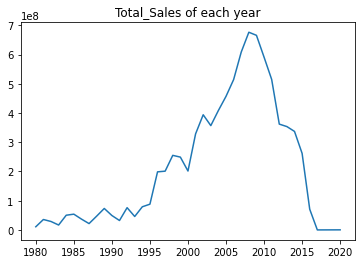

In [ ]:
plt.plot(data.groupby('Year')['Total_Sales'].sum())
plt.title('Total_Sales of each year')
plt.show()

In [ ]:
data[data['Year'] == 2010]['Total_Sales'].sum()

591150000.0

In [ ]:
data[data['Year'] == 2009]['Total_Sales'].sum()

665840000.0

In [ ]:
data[data['Year'] == 2008]['Total_Sales'].sum()

676410000.0

In [ ]:
data[data['Year'] == 2012]['Total_Sales'].sum()

362060000.0

In [ ]:
data[data['Year'] == 2015]['Total_Sales'].sum()

261830000.0

In [ ]:
data[data['Year'] == 2015]['Total_Sales'].sum()

261830000.0

In [ ]:
data[data['Year'] == 2017]['Total_Sales'].sum()

50000.0

In [ ]:
data[data['Year'] == 2020]['Total_Sales'].sum()

290000.0

In [ ]:
# 연도별 가장 많은 장르 끼리 묶자.
data_Y_G_T = data.groupby(['Year' , 'Genre'],as_index = False )['Total_Sales'].sum()
data_Y_G_T  = pd.DataFrame(data_Y_G_T)
data_Y_G_T

,Year,Genre,Total_Sales
0,1980,Action,340000.0
1,1980,Fighting,770000.0
2,1980,Misc,2700000.0
3,1980,Shooter,7070000.0
4,1981,Action,14790000.0
...,...,...,...
383,2016,Sports,14630000.0
384,2016,Strategy,520000.0
385,2017,Action,10000.0
386,2017,Role-Playing,40000.0


In [ ]:
aa = []
for i in range(1980, 2021): 
  aaa = (data_Y_G_T[(data_Y_G_T['Total_Sales'] == (data_Y_G_T[data_Y_G_T['Year'] == i]['Total_Sales'].max()))]['Genre'].tolist())
  aa = aa + aaa
print(aa)  

bb = []
for i in range(1980, 2021): 
  bbb = (data_Y_G_T[(data_Y_G_T['Total_Sales'] == (data_Y_G_T[data_Y_G_T['Year'] == i]['Total_Sales'].max()))]['Total_Sales'].tolist())
  bb = bb + bbb
print(bb)  
len(bb)

Year_list_0 = []
for i in range(1980,2021):
  Year_list_0.append(i)
print(Year_list_0)
len(Year_list_0)  

['Shooter', 'Action', 'Puzzle', 'Platform', 'Shooter', 'Platform', 'Action', 'Fighting', 'Platform', 'Puzzle', 'Platform', 'Platform', 'Fighting', 'Platform', 'Platform', 'Platform', 'Role-Playing', 'Racing', 'Sports', 'Role-Playing', 'Sports', 'Action', 'Action', 'Action', 'Action', 'Action', 'Sports', 'Action', 'Action', 'Sports', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Simulation', 'Role-Playing', 'Simulation']
[7070000.0, 14790000.0, 10040000.0, 6930000.0, 31100000.0, 43170000.0, 13740000.0, 5420000.0, 27730000.0, 37750000.0, 22980000.0, 7630000.0, 15230000.0, 18680000.0, 28760000.0, 16690000.0, 43990000.0, 31920000.0, 41750000.0, 47240000.0, 41240000.0, 56680000.0, 86650000.0, 67980000.0, 76150000.0, 85520000.0, 136120000.0, 105990000.0, 135460000.0, 138590000.0, 117500000.0, 119000000.0, 120780000.0, 125210000.0, 99010000.0, 68250000.0, 19840000.0, 40000.0, 40000.0, 290000.0]
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1

41

In [ ]:
#2019 자료는 아예 없으므로 2019년도는 빼버리자
del Year_list_0[39]
Year_list_0

In [ ]:
#데이터 프레임 새로 만들기
Year_H_S = pd.DataFrame({'Highest_Sales': bb, 'Year': Year_list_0, 'Genre': aa})

In [ ]:
# 장르별 색깔 정하기
g_c = []
for genre in Year_H_S['Genre']:
  if genre == 'Shooter':
    g_c.append('green')
  elif genre == 'Action':
    g_c.append('red') 
  elif genre == 'Puzzle':
    g_c.append('gold') 
  elif genre == 'Platform':
    g_c.append('skyblue') 
  elif genre == 'Fighting':
    g_c.append('darkslategray') 
  elif genre == 'Role-Playing':
    g_c.append('lightgray')
  elif genre == 'Racing':   
    g_c.append('black')      
  elif genre == 'Sports':   
    g_c.append('olive')
  elif genre == 'Simulation':   
    g_c.append('peru') 


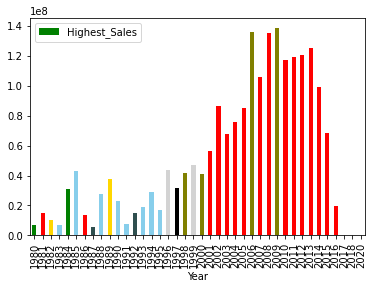

In [ ]:
Year_H_S.plot.bar(x = 'Year', y = 'Highest_Sales' ,color=g_c)
plt.legend()

In [ ]:
data.groupby(['Year','Genre'])['Total_Sales'].sum()

Year  Genre       
1980  Action            340000.0
      Fighting          770000.0
      Misc             2700000.0
      Shooter          7070000.0
1981  Action          14790000.0
                         ...    
2016  Sports          14630000.0
      Strategy          520000.0
2017  Action             10000.0
      Role-Playing       40000.0
2020  Simulation        290000.0
Name: Total_Sales, Length: 388, dtype: float64

In [ ]:
# 연도 별 가장 많은 매출을 기록한 장르들의 빈도 수를 나타내는 그래프

"""
2000년도 전에는 shooter 장르의 게임이 많이 분포함을 알 수 있다.
2000년도에 들어 action 게임이 가장 많은 매출들을 장기간 이룬 것을 볼 수 있다. --> action 게임이 2000년대 이후로 트렌드임을 알 수 있다.
"""

In [ ]:
# 연도별 장르마다의 매출을 더해서 그중 최

In [ ]:
"""
# 연도 별 가장 많은 장르의 게임 개수

# 데이터 프레임 새로 만들기
YG_df = pd.DataFrame({'Year' : data['Year'], 'Genre' : data['Genre'], 'num': 1})
YG_df
YG_df.groupby(['Year' , 'Genre'])['num'].sum()
"""

# 2. 지역에 따라 선호하는 게임 장르가 다를까

In [ ]:
"""
귀무 : 지역과 장르에 따른 판매수는 서로 독립적이다. (관계가 없다)
대안 : 지역과 장르에 따른 판매수는 서로 독립적이지 않다. (관계가 있다.) 
"""

In [ ]:
# 지역별 장르의 판매수 합을 나타내는 데이터 프레임 만들기
data_G_S = data.groupby('Genre')['NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
data_category = data_G_S[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype('category')
chi_2 = chi2_contingency(data_category)
chi_2

(684336340.5169278,
 0.0,
 33,
 array([[8.42668371e+08, 4.68299745e+08, 2.48746271e+08, 1.53265612e+08],
        [1.15121748e+08, 6.39771079e+07, 3.39826515e+07, 2.09384923e+07],
        [2.18191181e+08, 1.21256330e+08, 6.44075945e+07, 3.96848939e+07],
        [3.83558786e+08, 2.13156786e+08, 1.13222261e+08, 6.97621676e+07],
        [4.07314145e+08, 2.26358455e+08, 1.20234577e+08, 7.40828230e+07],
        [1.18422607e+08, 6.58115084e+07, 3.49570281e+07, 2.15388567e+07],
        [3.55444916e+08, 1.97532943e+08, 1.04923361e+08, 6.46487805e+07],
        [4.43480930e+08, 2.46457579e+08, 1.30910607e+08, 8.06608845e+07],
        [5.04106536e+08, 2.80149309e+08, 1.48806607e+08, 9.16875480e+07],
        [1.91498992e+08, 1.06422565e+08, 5.65283591e+07, 3.48300841e+07],
        [6.42137522e+08, 3.56857867e+08, 1.89551809e+08, 1.16792802e+08],
        [8.50942655e+07, 4.72898048e+07, 2.51188747e+07, 1.54770550e+07]]))

In [ ]:
"""
지역과 장르에 따른 판매수는 서로 독립적이지 않다. 즉 지역에 따라 선호하는 장르가 있음이 통계적으로 유의미한 판단을 할 수 있음을 알 수 있다.
"""

1-1 그렇다면 지역마다 어떤 장르의 게임 선호하는지 알아보자

In [ ]:
data_G_S_stand = (data_G_S  - data_G_S .mean(axis = 0))/(np.std(data_G_S , axis=0))

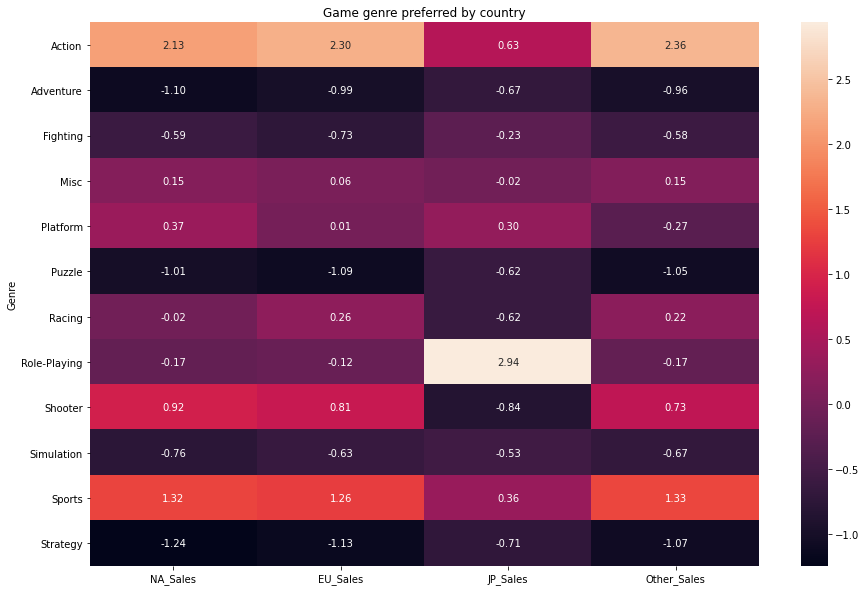

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_G_S_stand,annot=True, fmt='.2f')
plt.title("Game genre preferred by country")
plt.show();

In [ ]:
data_G_S_stand.iloc[[0,8,10]]


,NA_Sales,EU_Sales,Other_Sales
Genre,,,
Action,2.131861,2.299806,2.356632
Shooter,0.919400,0.810820,0.726175
Sports,1.315123,1.255444,1.331467


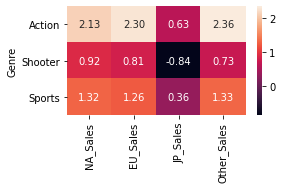

In [ ]:
plt.figure(figsize=(4, 2))
sns.heatmap(data_G_S_stand.iloc[[0,8,10]],annot=True, fmt='.2f')
plt.show();

In [ ]:
"""
위의 그래프는 장르와 지역별의 매출을 나타낸 데이터 프레임을 정규화를 통해 지역별 매출에 비례한 것을 나타낸 것이다.

상대적 선호도
Action부문에서  일본을 제외한 모든 지역에서 선호도가 2를 넘기는 모습을 볼 수 있다. 또한 일본을 제외한 모든 지역에서 sports, shooter 순으로 인기가 많음을 알 수 있다.
반면에 일본은 Role-Playing 장르가 2.94로 월등히 선호도가 높음을 알 수 있다.
"""

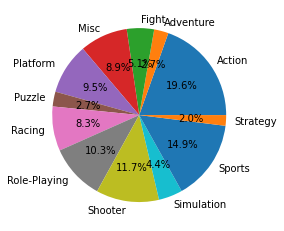

In [ ]:
#1980 ~ 2020 가장 높은 매출을 기록한 게임의 장르
Genre_list = ['Action', 'Adventure', 'Fight', 'Misc', 'Platform ', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
G_S_list = [1.712980e+09 , 2.340200e+08 , 4.435400e+08 , 7.797000e+08 , 8.279900e+08 , 2.407300e+08 , 7.225500e+08 , 9.015100e+08 , 1.024750e+09 , 3.892800e+08 , 1.305340e+09 , 1.729800e+08]

plt.pie(G_S_list, labels = Genre_list, autopct = '%.1f%%')

plt.show()

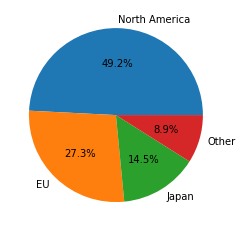

In [ ]:
Country_list = ['North America','EU','Japan','Other']
Sales_Sum = [ 4.307040e+09,  2.393570e+09,1.271390e+09, 7.833700e+08]
plt.pie(Sales_Sum, labels = Country_list, autopct = '%.1f%%')
plt.show()

In [ ]:
"""
상대적인 선호도에 따라 Action, Sports, Shooter, Role-Playing 게임이 높은 매출을 보이는 것을 알 수 있다.

특히 흥미로운 점은 상대적 선호도가 일본(시장 규모 또한 4지역중 3위임에도 불구하고) 에만 높은 Role-Playing 게임의 매출이 상당히 높은 것을 알 수 있다.
"""

In [ ]:
print(np.corrcoef(data_G_S_stand['NA_Sales'],data_G_S_stand['EU_Sales']))
print(np.corrcoef(data_G_S_stand['NA_Sales'],data_G_S_stand['Other_Sales']))
print(np.corrcoef(data_G_S_stand['NA_Sales'],data_G_S_stand['JP_Sales']))
print(np.corrcoef(data_G_S_stand['EU_Sales'],data_G_S_stand['JP_Sales']))
print(np.corrcoef(data_G_S_stand['Other_Sales'],data_G_S_stand['JP_Sales']))

[[1.         0.98648383]
 [0.98648383 1.        ]]
[[1.         0.97440146]
 [0.97440146 1.        ]]
[[1.         0.28537653]
 [0.28537653 1.        ]]
[[1.         0.27842787]
 [0.27842787 1.        ]]
[[1.        0.2635619]
 [0.2635619 1.       ]]


In [ ]:
"""
해석
일본을 제외한 나머지 나라에서 장르별 선호도의 상관계수가 1과 가깝게 나왔다. 
이는 NA,EU,Other_Sales에 대한 산점도를 그렸을 떄 유사한 방향으로 그래프가 그려진다는 것을 의미한다. 
즉, 3지역의 선호도는 유사하며, 지역별 선호도의 차이가 없음을 의미한다.

반면에 일본은 상관계수가 약 0.3정도 다른 값에 비해 작게 나온 것을 볼 수 있다. 
일본은 다른 지역과 장르별 선호도가 유사하지 않고 선호 장르가 독특함을 의미합니다.
"""

'\n해석\n일본을 제외한 나머지 나라에서 장르별 선호도의 상관계수가 1과 가깝게 나왔다. \n이는 NA,EU,Other_Sales에 대한 산점도를 그렸을 떄 유사한 방향으로 그래프가 그려진다는 것을 의미한다. \n즉, 3지역의 선호도는 유사하며, 지역별 선호도의 차이가 없음을 의미한다.\n\n반면에 일본은 상관계수가 약 0.3정도 다른 값에 비해 작게 나온 것을 볼 수 있다. \n일본은 다른 지역과 장르별 선호도가 유사하지 않고 선호 장르가 독특함을 의미합니다.\n'

# 일본에서의 Role_Playing 게임에 대한 높은 선호도에 대해서 알아보자

In [ ]:
data_G_R = data[data['Genre'] == 'Role-Playing']


In [ ]:
data_G_R[data_G_R['JP_Sales'] > 0]['Name']
data_G_R[data_G_R['JP_Sales'] > 0]['JP_Sales']
data_G_R[data_G_R['JP_Sales'] > 0]['Year']
data_G_R[data_G_R['JP_Sales'] > 0]['Platform']

Japan_sales_R = pd.DataFrame({'Name' : data_G_R[data_G_R['JP_Sales'] > 0]['Name'],
             'Platform' : data_G_R[data_G_R['JP_Sales'] > 0]['Platform'],
             'Year' : data_G_R[data_G_R['JP_Sales'] > 0]['Year'],
             'JP_Sales' : data_G_R[data_G_R['JP_Sales'] > 0]['JP_Sales']})
Japan_sales_R['JP_Sales'] = Japan_sales_R['JP_Sales']

In [ ]:
Japan_sales_R[Japan_sales_R['Year'] == 2017]

,Name,Platform,Year,JP_Sales
9911,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,30000.0
14903,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,10000.0


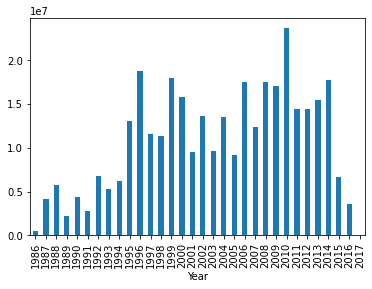

In [ ]:
Japan_sales_R.groupby('Year')['JP_Sales'].sum().plot.bar(x ='Year', y ='JP_Sales')

In [ ]:
"""
일본에 Role-Playing 게임에 대한 상대적인 선호도가 높을지라도 2016년 이후로는 매출이 급감한 것을 볼 수 있다.
"""
# 그렇다면 일본 2016년이 후로 Role-playing game 에 따른 상대적 선호도가 낮아 져서 그런지, 아니면 게임 자체의 매출이 줄어 들었기 때문인지,

In [ ]:
data_T_J = pd.DataFrame({'Total_Sales' : data.groupby('Year')['Total_Sales'].sum(),
              'JP_Sales' : Japan_sales_R.groupby('Year')['JP_Sales'].sum()})
data_T_J.fillna(0)

In [ ]:
# 최대-최소 값으로 정규화
data_T_J_stand = ((data_T_J-data_T_J.min())/ (data_T_J.max()-data_T_J.min()))
data_T_J_stand = data_T_J_stand.fillna(data_T_J_stand.mean())
data_T_J_stand = data_T_J_stand.drop([data_T_J_stand.index[37]])

In [ ]:
# 연도 별 게임 판매수와 일본에서 판매된 Role-Playing 게임이 서로 관계 있는지 알아보자.
data_T_J_category = data_T_J_stand[['Total_Sales','JP_Sales']].astype('category')
chi_0 = chi2_contingency(data_T_J_category, correction = False)
chi_0

(3.521547303709203, 0.9999999999997607, 37, array([[0.19810516, 0.26972939],
        [0.21363179, 0.29086962],
        [0.20937449, 0.28507311],
        [0.20181152, 0.27477577],
        [0.2228163 , 0.30337475],
        [0.22507016, 0.30644349],
        [0.03178515, 0.04327696],
        [0.0877436 , 0.11946699],
        [0.13238686, 0.18025087],
        [0.08466118, 0.11527013],
        [0.10936788, 0.14890946],
        [0.06978566, 0.09501642],
        [0.16931526, 0.2305306 ],
        [0.12212541, 0.16627943],
        [0.16049152, 0.21851667],
        [0.28898902, 0.39347199],
        [0.46021053, 0.62659803],
        [0.33229261, 0.45243185],
        [0.36204159, 0.49293646],
        [0.47798498, 0.65079877],
        [0.40856798, 0.5562843 ],
        [0.37612273, 0.51210859],
        [0.49039862, 0.66770053],
        [0.39526796, 0.53817571],
        [0.49695146, 0.67662253],
        [0.45066586, 0.61360252],
        [0.63496818, 0.86453871],
        [0.60302696, 0.82104925],
     

In [ ]:
"""

pvalue 값이 거의 1에 가깝다. 이는 연도별 게임의 판매수와, 일본 내에서 판매되는 Role-Playing의 게임은 관련이 없음을 나타낸다.
최근 일본내에서 Role-Playing 에 대한 선호도가 그래프대로 감소한 것을 알 수 있다.

"""

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.



In [ ]:
data[data['Total_Sales'] > 1000000.0].mean()
data[data['Total_Sales'] > 2.770000e+06]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
119,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5910000.0,2380000.0,130000.0,900000.0,9320000.0
123,Mortal Kombat,PS3,2011,Fighting,Warner Bros. Interactive Entertainment,1980000.0,550000.0,0.0,320000.0,2850000.0
160,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,200000.0,140000.0,4100000.0,20000.0,4460000.0
189,Left 4 Dead 2,X360,2009,Shooter,Electronic Arts,2670000.0,890000.0,50000.0,370000.0,3980000.0
220,Just Dance 3,Wii,2011,Misc,Ubisoft,6050000.0,3150000.0,0.0,1070000.0,10270000.0
...,...,...,...,...,...,...,...,...,...,...
16160,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3660000.0,2420000.0,980000.0,640000.0,7700000.0
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
16189,Spider-Man 2,PS2,2004,Action,Activision,1750000.0,1200000.0,20000.0,430000.0,3400000.0
16197,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2660000.0,500000.0,50000.0,300000.0,3510000.0


In [ ]:
data_M = data[data['Total_Sales'] > 10000000.0]
data_M 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
220,Just Dance 3,Wii,2011,Misc,Ubisoft,6050000.0,3150000.0,0.0,1070000.0,10270000.0
503,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3440000.0,5360000.0,5320000.0,1180000.0,15300000.0
992,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6850000.0,5090000.0,1870000.0,1160000.0,14970000.0
1187,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
1780,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4340000.0,2650000.0,3150000.0,350000.0,10490000.0
...,...,...,...,...,...,...,...,...,...,...
14355,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10570000.0,20810000.0
14540,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9540000.0,3440000.0,3840000.0,460000.0,17280000.0
14586,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6750000.0,2610000.0,2660000.0,1020000.0,13040000.0
16120,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4760000.0,3760000.0,440000.0,1620000.0,10580000.0


In [ ]:
data_M['num'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_M['Genre'].unique()


array(['Misc', 'Puzzle', 'Racing', 'Role-Playing', 'Action', 'Shooter',
       'Sports', 'Platform', 'Simulation', 'Adventure', 'Fighting'],
      dtype=object)

In [ ]:
# 평균 판매 : 약 50만
data['Total_Sales'].mean()

539090.573240564

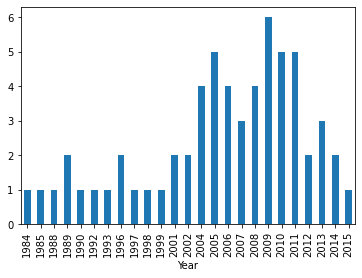

In [ ]:
#천만 이상 매출을 기록한 게임들 중 연도 분포
data_M.groupby(['Year'])['num'].sum().plot.bar()

In [ ]:
# 2010년 이후로 게임시장의 전체적인 매출이 감소함에도 1000만 판매량을 넘긴 게임들을 살펴보자
data_M[data_M['Year']>2010]['Name']

220                                   Just Dance 3
1973                            Grand Theft Auto V
2757                Call of Duty: Modern Warfare 3
3414                            Grand Theft Auto V
4152                    Call of Duty: Black Ops II
4163     Pokemon Omega Ruby/Pokemon Alpha Sapphire
5489                          Call of Duty: Ghosts
6257                    Call of Duty: Black Ops II
8892                     Call of Duty: Black Ops 3
10695                           Grand Theft Auto V
10901                                 Mario Kart 7
12359                          Super Mario 3D Land
13814               Call of Duty: Modern Warfare 3
Name: Name, dtype: object

In [ ]:
data_M[data_M['Year']>2010]['Genre']

220              Misc
1973           Action
2757          Shooter
3414           Action
4152          Shooter
4163     Role-Playing
5489          Shooter
6257          Shooter
8892          Shooter
10695          Action
10901          Racing
12359        Platform
13814         Shooter
Name: Genre, dtype: object

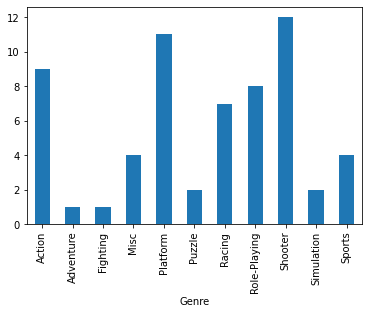

In [ ]:
# 천만 이상 매출을 기록한 게임들중 장르 분포도
data_M.groupby(['Genre'])['num'].sum().plot.bar()

In [ ]:
data_M.groupby(['Genre'])['num'].sum()

Genre
Action           9
Adventure        1
Fighting         1
Misc             4
Platform        11
Puzzle           2
Racing           7
Role-Playing     8
Shooter         12
Simulation       2
Sports           4
Name: num, dtype: int64

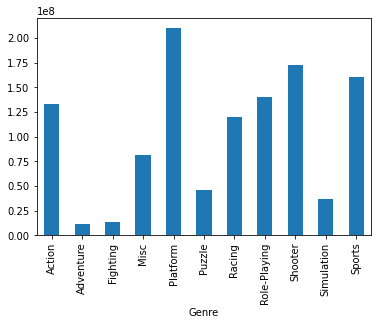

In [ ]:
# 천만 이상 매출을 기록한 게임들중 장르 별 판매 수
data_M.groupby(['Genre'])['Total_Sales'].sum().plot.bar()

In [ ]:
# 장르 때문에 게임이 인기가 있는지, 아니면 게임자체가 재미 있어서 인기가 있는건지
"""
귀무 : 1000만 이상의 매출을 기록한 게임은 장르와 관련이 있다.
대안 : 1000만 이상의 매출을 기록한 게임은 장르와 관련이 없다. --> 게임 자체가 재미있는 것이다.
"""
# 1000만 이상의 매출을 기록한 장르의 매출과 random으로 뽑은(수는 같게) 
# 1000이상의 매출을 기록한 게임을 제외하고 나머지에서의 매출과 비교

In [ ]:
# 1000만 이상 달성한  장르가 action인 게임들의 매출
data_M[data_M['Genre'] == 'Action']['Total_Sales']

1973     11990000.0
3414     21390000.0
4704     11900000.0
5226     16150000.0
9597     13100000.0
10695    16380000.0
13626    11030000.0
14355    20810000.0
16120    10580000.0
Name: Total_Sales, dtype: float64

In [ ]:
data[data['Genre']=='Action']['Total_Sales']

0          40000.0
1         180000.0
7         190000.0
9          80000.0
15        360000.0
           ...    
16219    1080000.0
16225     270000.0
16227    1430000.0
16237      10000.0
16239     380000.0
Name: Total_Sales, Length: 3240, dtype: float64

In [ ]:
np.random.seed(123)

rand_sample = np.random.choice(data[data['Genre']=='Action']['Total_Sales'], size = 9, replace =False)
rand_sample 

array([ 480000.,  130000.,   60000.,  310000.,  130000.,   20000.,
       1310000.,  160000.,  140000.])

In [ ]:
rsdm_data = pd.DataFrame({'r_s' : rand_sample, 'd_m' : data_M[data_M['Genre'] == 'Action']['Total_Sales']})

In [ ]:
rsdm_data_stand = (rsdm_data - rsdm_data.mean(axis = 0))/(np.std(rsdm_data , axis=0))
rsdm_data_stand

,r_s,d_m
1973,0.463449,-0.729045
3414,-0.460516,1.697282
4704,-0.645308,-0.752276
5226,0.014666,0.344733
9597,-0.460516,-0.442532
10695,-0.750904,0.404101
13626,2.654564,-0.976840
14355,-0.381319,1.547572
16120,-0.434117,-1.092994


In [ ]:
pv = stats.ttest_ind(rsdm_data_stand['r_s'], rsdm_data_stand['d_m']).pvalue
pv

0.9999999999999998

In [ ]:
# 천만 이상 팔린 모든 게임이 특정 장르 때문에 많이 팔린 것이아닌 게임 자체가 재미있기 때문에 많은 매출을 기록한 것으로 볼 수 있다. 

In [ ]:
# 꾸준히 잘팔리는 장르의 게임을 찾아보자

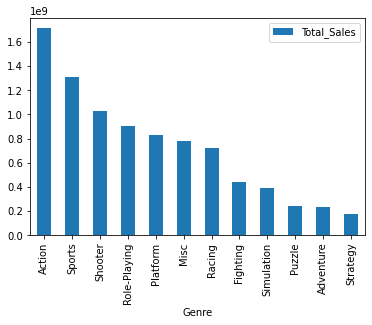

In [ ]:
# 장르별 총 판매수를 구해보자
pd.DataFrame({'Total_Sales' : data.groupby(['Genre'])['Total_Sales'].sum()}).sort_values(by=['Total_Sales'], ascending = False).plot.bar()

In [ ]:
#플랫폼 게임의 매출이 언제 부터 시작되는지
data[data['Genre']=='Platform']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
20,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,570000.0,450000.0,0.0,150000.0,1170000.0
25,Dr. Muto,GC,2002,Platform,Midway Games,20000.0,10000.0,0.0,0.0,30000.0
28,Famicom Mini: Makaimura,GBA,2004,Platform,Capcom,0.0,0.0,80000.0,0.0,80000.0
33,Mega Man Anniversary Collection,PS2,2004,Platform,Capcom,290000.0,220000.0,0.0,80000.0,590000.0
...,...,...,...,...,...,...,...,...,...,...
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
16207,Wall-E,Wii,2008,Platform,THQ,510000.0,400000.0,0.0,110000.0,1020000.0
16222,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320000.0,220000.0,0.0,40000.0,580000.0
16223,Super Ghouls 'n Ghosts,GBA,2002,Platform,Capcom,50000.0,20000.0,0.0,0.0,70000.0


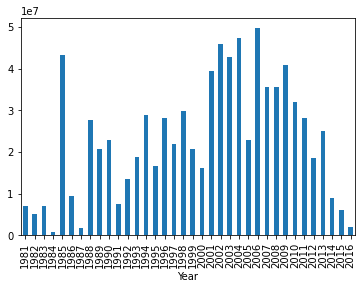

In [ ]:
data[data['Genre']=='Platform'].groupby(['Year'])['Total_Sales'].sum().plot.bar()

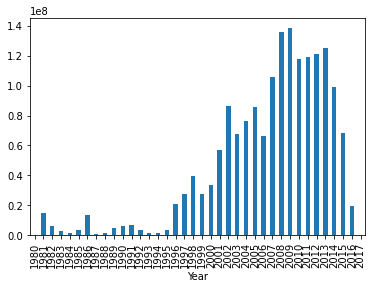

In [ ]:
data[data['Genre']=='Action'].groupby(['Year'])['Total_Sales'].sum().plot.bar()

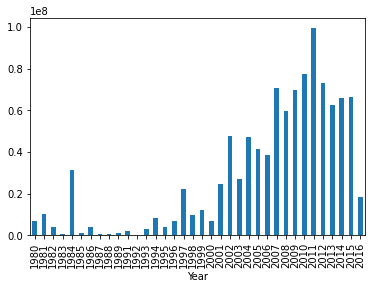

In [ ]:
data[data['Genre']=='Shooter'].groupby(['Year'])['Total_Sales'].sum().plot.bar()

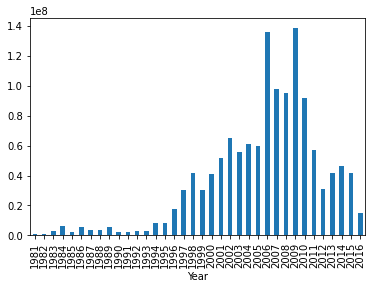

In [ ]:
data[data['Genre']=='Sports'].groupby(['Year'])['Total_Sales'].sum().plot.bar()

In [ ]:
data['num'] =1

In [ ]:
#플랫폼과 게임 매출의 관계성

In [ ]:
data[data['Year']>2000]

In [ ]:
data[data['Year']>2000][['Platform','Total_Sales']]

,Platform,Total_Sales
0,DS,40000.0
1,Wii,180000.0
2,PSP,20000.0
3,DS,40000.0
4,PS3,250000.0
...,...,...
16235,PSP,20000.0
16236,GC,200000.0
16237,PSP,10000.0
16238,PS3,790000.0


In [ ]:
model = ols('Total_Sales ~ C(Platform)', data = data[data['Year']>2010][['Platform','Total_Sales']]).fit()
anova_table = sm.stats.anova_lm(model, type =2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),11.0,2.331302e+14,2.119365e+13,15.157186,2.664942e-29
Residual,3855.0,5.390283e+15,1.398258e+12,NaN,NaN


In [ ]:
model = ols('Total_Sales ~ C(Platform)', data = data[data['Year']<2000][['Platform','Total_Sales']]).fit()
anova_table = sm.stats.anova_lm(model, type =2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),17.0,8.250027e+14,4.852957e+13,11.937845,5.034676e-32
Residual,1950.0,7.927114e+15,4.065187e+12,NaN,NaN


In [ ]:
#연도와 플랫폼의 연관성
model = ols('Year ~ C(Platform)', data = data[data['Year']<2000][['Platform','Year']]).fit()
anova_table = sm.stats.anova_lm(model, type =2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Platform),17.0,32943.593159,1937.858421,692.107773,0.0
Residual,1950.0,5459.877878,2.799937,NaN,NaN


In [ ]:
obs_0= pd.crosstab(data['Genre'], data['Platform'])
print(chi2_contingency(obs_0,correction = False))

(5820.019068400998, 0.0, 330, array([[2.29419371e+01, 5.98485315e-01, 9.93485623e+01, 1.03737455e+01,
        4.24326088e+02, 1.93510252e+01, 1.56404162e+02, 1.07926852e+02,
        5.38636783e+00, 1.99495105e-01, 6.24419679e+01, 1.95505203e+01,
        2.39394126e+00, 1.86527923e+02, 1.99495105e-01, 2.36401699e+02,
        4.23129118e+02, 2.59144141e+02, 6.68308602e+01, 2.37997660e+02,
        8.15934979e+01, 3.45126532e+01, 1.19697063e+00, 4.76793301e+01,
        3.98990210e-01, 1.19697063e+00, 2.56151715e+02, 2.85278000e+01,
        2.45578474e+02, 1.59396589e+02, 4.22929623e+01],
       [8.97851118e+00, 2.34222031e-01, 3.88808571e+01, 4.05984853e+00,
        1.66063420e+02, 7.57317899e+00, 6.12100240e+01, 4.22380395e+01,
        2.10799828e+00, 7.80740102e-02, 2.44371652e+01, 7.65125300e+00,
        9.36888123e-01, 7.29991996e+01, 7.80740102e-02, 9.25177021e+01,
        1.65594976e+02, 1.01418139e+02, 2.61547934e+01, 9.31422942e+01,
        3.19322702e+01, 1.35068038e+01, 4.6844406

In [ ]:
data_GA = data[(data['Genre']=='Action')]
data_GA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,num
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0,1
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000.0,0.0,110000.0,10000.0,190000.0,1
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0,1
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,140000.0,160000.0,0.0,60000.0,360000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
16219,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000.0,640000.0,0.0,80000.0,1080000.0,1
16225,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0,1
16227,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,910000.0,390000.0,0.0,130000.0,1430000.0,1
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0,1


In [ ]:
data_GA[data_GA['Year']>2000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,num
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0,1
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,70000.0,0.0,110000.0,10000.0,190000.0,1
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,40000.0,30000.0,0.0,10000.0,80000.0,1
15,Mini Ninjas,PS3,2009,Action,Eidos Interactive,140000.0,160000.0,0.0,60000.0,360000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
16219,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000.0,640000.0,0.0,80000.0,1080000.0,1
16225,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,130000.0,120000.0,0.0,20000.0,270000.0,1
16227,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,910000.0,390000.0,0.0,130000.0,1430000.0,1
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0,1


In [ ]:
data_P_T = data_GA[data_GA['Year']>2000][['Platform','Total_Sales']]
data_P_T

,Platform,Total_Sales
0,DS,40000.0
1,Wii,180000.0
7,PSP,190000.0
9,PS3,80000.0
15,PS3,360000.0
...,...,...
16219,PC,1080000.0
16225,XOne,270000.0
16227,Wii,1430000.0
16237,PSP,10000.0


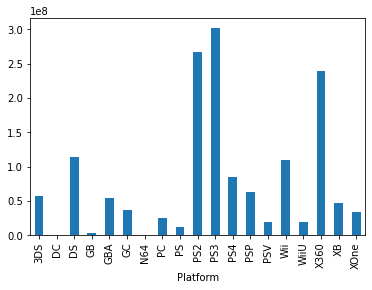

In [ ]:
data_P_T.groupby(['Platform'])['Total_Sales'].sum().plot.bar()

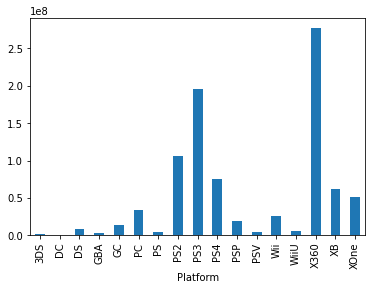

In [ ]:
data_GS = data[(data['Genre']=='Shooter')]
data_P_T_S = data_GS[data_GS['Year']>2000][['Platform','Total_Sales']]
data_P_T_S.groupby(['Platform'])['Total_Sales'].sum().plot.bar()

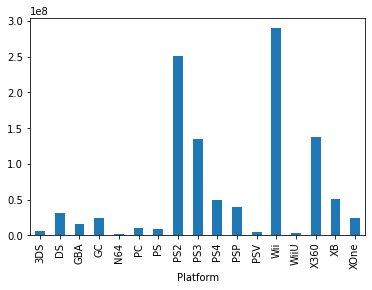

In [ ]:
data_GS = data[(data['Genre']=='Sports')]
data_P_T_S = data_GS[data_GS['Year']>2000][['Platform','Total_Sales']]
data_P_T_S.groupby(['Platform'])['Total_Sales'].sum().plot.bar()